# Stable diffusion

This notebooks contains examples on how to copy demo code from HuggingFace to run a model. This should run either on a computer with a large GPU in a fresh environment or on Google Colab.

## Stable diffusion 1.4

The first model is from the original stable diffusion models. The model has a reasonable size but doesn't generate pictures as detailed as more recent versions. We follow here the instructions given on HugginFace to run a minimal example: https://huggingface.co/CompVis/stable-diffusion-v1-4

First we need to install required libraries. In particular the diffusers library from HuggingFace which makes it very easy to interact with models:

In [ ]:
!pip install --upgrade diffusers transformers scipy

Now we can run the proposed code and modify the prompt:

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

In [ ]:
prompt = "a picture of a cat with a large red hat in Velázquez style"
image = pipe(prompt).images[0]

image.save("cat_red_hat.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

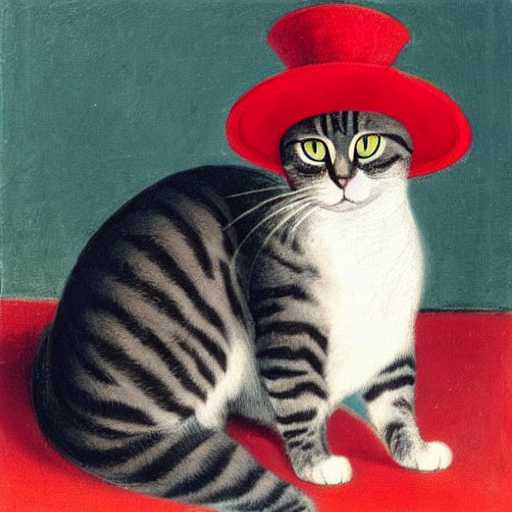

In [ ]:
image

## In painting

Diffusion models are capable of not only turning text to images but also to include an image in the process. One example of this is inpainting, where a region of an image is replaced via a prompt and a mask:

In [3]:
import torch
from diffusers import StableDiffusionInpaintPipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
from PIL import Image

In [36]:
image = Image.open("woody_baille.JPG")
mask = Image.open("woody_mask.png")

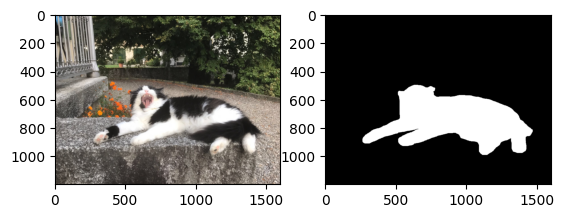

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].imshow(image)
ax[1].imshow(mask);

We can first run the simple command providing image and mask with other options set to defaults:

In [52]:
pipe.to("cuda")
prompt = "A colorful bird, high-res realistic."
#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
gen_images = pipe(prompt=prompt, image=image, mask_image=mask).images

  0%|          | 0/50 [00:00<?, ?it/s]

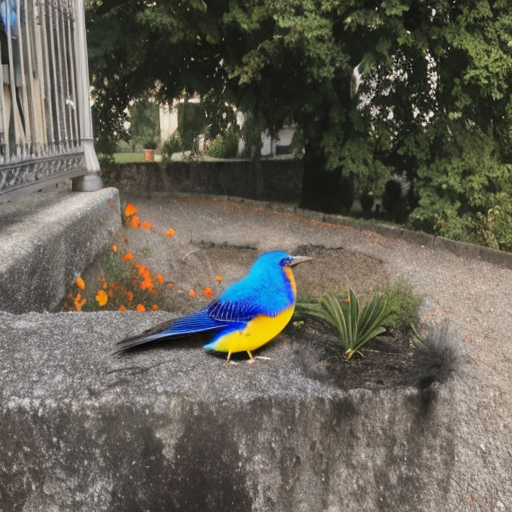

In [53]:
gen_images[0]

We can now refine the output with options.
1. We ensure that the output has a similar aspect ratio as the original (default is square). For this we divide the dimensions by 3 but make sure that the numbers are divisible by 8 as required by the model.
2. We can generate more than one output, to see the diversity
3. We can request the output to be a numpy array
4. We can run more steps of the inference to see if the result improves.

In [54]:
im_width = int(8 * (image.width / 3 // 8))
im_height = int(8 * (image.height / 3 // 8))

In [55]:
pipe.to("cuda")
prompt = "A colorful bird, high-res realistic."
#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
gen_images = pipe(prompt=prompt, image=image, mask_image=mask, height=im_height, width=im_width,
              num_images_per_prompt=3, output_type='np.array',
              num_inference_steps=100).images

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/image_processor.py:749: FutureWarning: the output_type np.array is outdated and has been set to `np`. Please make sure to set it to one of these instead: `pil`, `np`, `pt`, `latent`
  deprecate("Unsupported output_type", "1.0.0", deprecation_message, standard_warn=False)


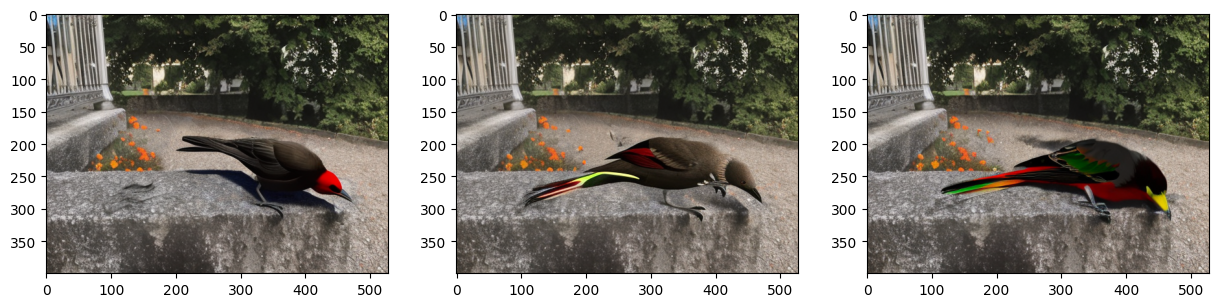

In [57]:
fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(gen_images[0])
ax[1].imshow(gen_images[1])
ax[2].imshow(gen_images[2]);